# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anindya Zulva Larasati
- **Email:** anindyazulva09@gmail.com
- **ID Dicoding:** anindyazlv

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara jumlah penyewa sepeda dengan suatu musim pada tahun 2011 dan 2012?
- Bagaimana distribusi antara penyewa sepeda terdaftar (registered) dan penyewa casual dalam penyewaan sepeda pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data Wrangling terbagi menjadi tiga tahap, yaitu: Gathering Data, Assessing Data, dan Cleaning Data

### Gathering Data

Kode di bawah ini akan membaca data yang ada pada file `day.csv` dan menyimpannya pada variabel `day_df`. Selanjutnya, akan menampilkan lima data pertama yang tersimpan pada variabel `day_df`

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Pada tahap assessing data akan dilakukan penilaian data untuk mengetahui berbagai permasalahan yang terdapat dalam data.

Pada tahap ini dimulai dengan memeriksa tipe data dari tiap kolom yang terdapat dalam `day_df`

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat diketahui jumlah data pada `day_df` lengkap yang mengindikasikan bahwa tidak terdapat missing value. Namun, terdapat kesalahan tipe data pada kolom `dteday` yang seharusnya direpresentasikan dengan tipe data `datetime`. Kesalahan tipe data juga terjadi pada kolom `season` yang seharusnya direpresentasikan dengan tipe data `object`. Kesalahan ini nantinya akan dibersihkan pada tahap cleaning data.


Setelah itu, perlu memeriksa duplikasi data pada `day_df`

In [4]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan pemeriksaan duplikasi data, dapat diketahui bahwa tidak terdapat duplikasi data pada `day_df`

Kemudian dilakukan pemeriksaan parameter statistik pada kolom numerik dalam `day_df`

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan pemeriksaan parameter statistik, terdapat keanehan pada kolom `season` yang berisi data kategoris yang mewakili setiap musim dan pada kolom `yr` yang juga berisi data kategoris yang mewakili tahun 2011 dan 2012. Kesalahan ini nantinya akan dibersihkan pada tahap cleaning data.

### Cleaning Data

Saat tahap Assessing Data, ditemukan permasalahan yang ada pada data `day_df` yaitu kesalahan tipe data pada kolom `dteday`, kesalahan tipe data pada kolom `season`, nilai yang kurang tepat pada kolom `season` dan kolom `yr` yang diwakili oleh data kategoris. Untuk itu, proses cleaning data ini akan membersihkan kesalahan tersebut.

Akan dilakukan cleaning data pada `day_df` yaitu mengganti tipe data pada kolom `dteday` dengan tipe data yang sesuai yaitu `datetime`

In [6]:
day_columns = ["dteday"]

for column in day_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kode di atas berhasil mengubah tipe data kolom `dteday` menjadi bertipe data `datetime`

Lalu, perlu dilakukan penggantian nilai dan tipe data pada kolom `season`.

In [7]:
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kode di atas berhasil mengubah tipe data dan nilai pada kolom `season`.

Selanjutnya, perlu dilakukan penggantian nilai pada kolom `yr`.

In [8]:
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})

day_df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan pengecekan kolom numerik pada `day_df`, tidak terjadi keanehan dan data telah sesuai. Oleh karena itu, proses Data Wrangling selesai dilakukan.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

Sebagai permulaan, berikut adalah rangkuman parameter statistik dari `day_df` dengan menggunakan method `describe()`.

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Selanjutnya, akan melihat jumlah penyewa sepeda setiap musimnya dalam satu tahun.

Kode di bawah ini akan menampilkan data penyewa sepeda berdasarkan musimnya pada tahun 2011.

In [10]:
total_cnt_2011 = day_df[day_df['yr'] == 2011].groupby(by=['season'])['cnt'].sum()
formatted_total_cnt_2011 = total_cnt_2011.map("{:,}".format)

print(formatted_total_cnt_2011)

season
Fall      419,650
Spring    150,000
Summer    347,316
Winter    326,137
Name: cnt, dtype: object


Dapat diketahui pada tahun 2011 penyewa sepeda terbanyak terdapat pada musim gugur (fall), disusul oleh musim panas (summer), musim dingin (winter), dan yang terakhir musim semi (spring).

Kemudian, kode di bawah ini akan menampilkan data penyewa sepeda berdasarkan musimnya pada tahun 2012.

In [11]:
total_cnt_2012 = day_df[day_df['yr'] == 2012].groupby(by=["season"])['cnt'].sum()
formatted_total_cnt_2012 = total_cnt_2012.map("{:,}".format)

print(formatted_total_cnt_2012)

season
Fall      641,479
Spring    321,348
Summer    571,273
Winter    515,476
Name: cnt, dtype: object


Dapat diketahui pada tahun 2012 penyewa sepeda terbanyak terdapat pada musim gugur (fall), disusul oleh musim panas (summer), musim dingin (winter), dan yang terakhir musim semi (spring).

Selanjutnya, akan melihat distribusi penyewa sepeda yang terdaftar (registered) dan penyewa casual pada tahun 2011.

Kode dibawah ini akan menampilkan distribusi penyewa sepeda pada tahun 2011.

In [12]:
total_casual_2011 = day_df[(day_df['yr'] == 2011)]['casual'].sum()
total_registered_2011 = day_df[(day_df['yr'] == 2011)]['registered'].sum()
total_users_2011 = total_casual_2011 + total_registered_2011

print("casual:", "{:,}".format(total_casual_2011))
print("registered:", "{:,}".format(total_registered_2011))
print("total:", "{:,}".format(total_users_2011))

casual: 247,252
registered: 995,851
total: 1,243,103


Dapat diketahui bahwa penyewa sepeda yang terdaftar (registered) pada tahun 2011 lebih banyak daripada penyewa casual.

Selanjutnya, kode di bawah ini akan menampilkan distribusi penyewa sepeda pada tahun 2012.

In [13]:
total_casual_2012 = day_df[(day_df['yr'] == 2012)]['casual'].sum()
total_registered_2012 = day_df[(day_df['yr'] == 2012)]['registered'].sum()
total_users_2012 = total_casual_2012 + total_registered_2012

print("casual:", "{:,}".format(total_casual_2012))
print("registered:", "{:,}".format(total_registered_2012))
print("total:", "{:,}".format(total_users_2012))

casual: 372,765
registered: 1,676,811
total: 2,049,576


Sama seperti tahun sebelumnya, jumlah penyewa sepeda yang terdaftar (registered) pada tahun 2012 lebih banyak daripada penyewa casual. Akan tetapi, pada tahun 2012 terjadi peningkatan jumlah penyewa terdaftar, casual, dan jumlah total penyewa sepeda secara keseluruhan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara jumlah penyewa sepeda dengan suatu musim pada tahun 2011 dan 2012?

Untuk menjawab pertanyaan di atas, akan menggunakan kode yang sebelumnya telah digunakan pada tahap exploratory data.

Berikut adalah kode untuk menunjukkan hubungan antara penyewa sepeda dengan suatu musim pada tahun 2011.

In [14]:
total_cnt_2011 = day_df[day_df['yr'] == 2011].groupby(by=['season'])['cnt'].sum()
formatted_total_cnt_2011 = total_cnt_2011.map("{:,}".format)

print(formatted_total_cnt_2011)

season
Fall      419,650
Spring    150,000
Summer    347,316
Winter    326,137
Name: cnt, dtype: object


Dapat diketahui bahwa penyewa sepeda pada tahun 2011 paling banyak terdapat pada musim gugur (fall) dengan 419,650 penyewa dan paling sedikit terdapat pada musim gugur (spring) dengan 150,000 penyewa.

Untuk memudahkan pemahaman terkait dengan hubungan antara jumlah penyewa sepeda dengan musimnya, maka berikut adalah bar chart untuk memvisualisasikan data di atas.

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


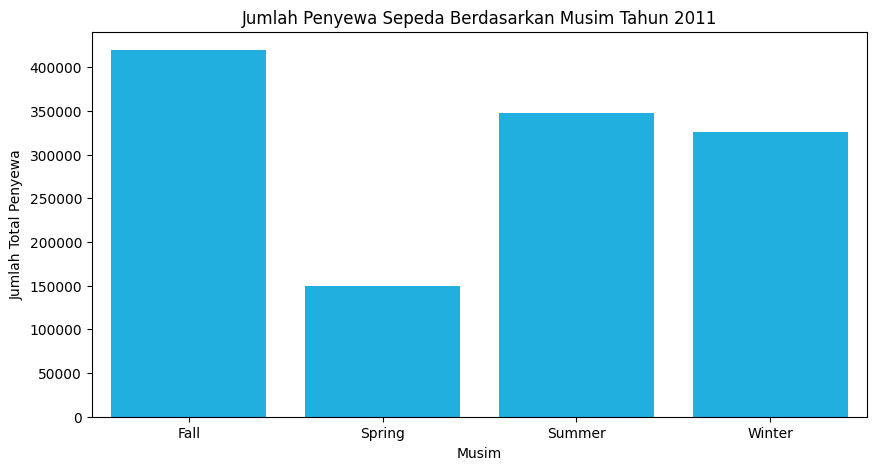

In [15]:
total_cnt_2011 = day_df[day_df['yr'] == 2011].groupby(by=['season'])['cnt'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=total_cnt_2011.index,
    y=total_cnt_2011.values,
    color= '#00BFFF'
    )
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim Tahun 2011')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewa')
plt.show()

Bar Chart tersebut menunjukkan hubungan antara jumlah penyewa sepeda pada tahun 2011, yaitu: jumlah penyewa sepeda terbanyak adalah musim gugur (fall), di urutan kedua jumlah penyewa sepeda terbanyak adalah musim panas (summer), urutan ketiga musim dingin (winter), dan urutan terakhir adalah musim semi (spring).

Selanjutnya adalah kode untuk menunjukkan hubungan antara penyewa sepeda dengan suatu musim pada tahun 2012.

In [16]:
total_cnt_2012 = day_df[day_df['yr'] == 2012].groupby(by=["season"])['cnt'].sum()
formatted_total_cnt_2012 = total_cnt_2012.map("{:,}".format)

print(formatted_total_cnt_2012)

season
Fall      641,479
Spring    321,348
Summer    571,273
Winter    515,476
Name: cnt, dtype: object


Dapat diketahui bahwa penyewa sepeda pada tahun 2012 paling banyak di musim gugur (fall) dengan 641,479 penyewa dan paling sedikit di musim gugur (spring) dengan 321,348 penyewa.

Untuk memudahkan pemahaman terkait dengan hubungan antara jumlah penyewa sepeda dengan musimnya, maka berikut adalah bar chart untuk memvisualisasikan data di atas.

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


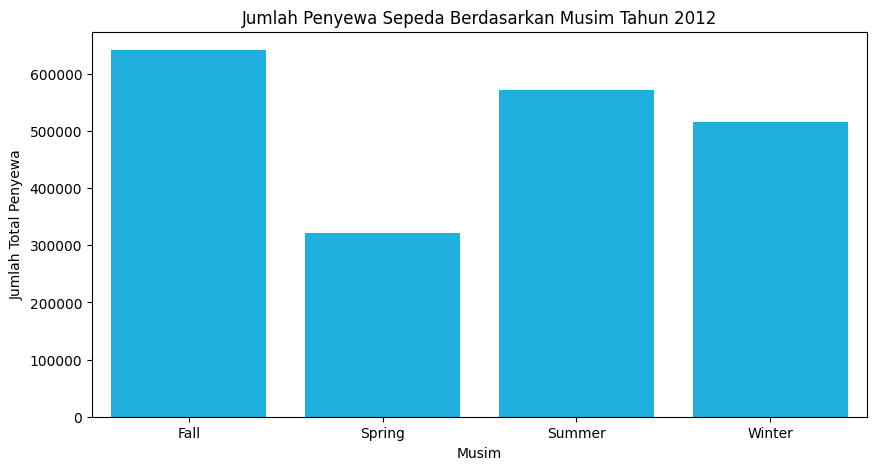

In [17]:
total_cnt_2012 = day_df[day_df['yr'] == 2012].groupby(by=['season'])['cnt'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=total_cnt_2012.index,
    y=total_cnt_2012.values,
    color= '#00BFFF'
    )
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim Tahun 2012')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewa')
plt.show()

Bar Chart tersebut menunjukkan hubungan antara jumlah penyewa sepeda pada tahun 2012, yaitu: jumlah penyewa sepeda terbanyak adalah musim gugur (fall), di urutan kedua jumlah penyewa sepeda terbanyak adalah musim panas (summer), urutan ketiga musim dingin (winter), dan urutan terakhir adalah musim semi (spring).

### Pertanyaan 2: Bagaimana distribusi antara penyewa sepeda terdaftar (registered) dan penyewa casual dalam penyewaan sepeda pada tahun 2011 dan 2012?

Untuk menjawab pertanyaan di atas, akan menggunakan kode yang sebelumnya telah digunakan pada tahap exploratory data.

Berikut adalah kode untuk mengetahui jumlah distribusi penyewa sepeda terdaftar (registered) dan penyewa casual, serta jumlah total penyewa sepeda pada tahun 2011.

In [18]:
total_casual_2011 = day_df[(day_df['yr'] == 2011)]['casual'].sum()
total_registered_2011 = day_df[(day_df['yr'] == 2011)]['registered'].sum()
total_users_2011 = total_casual_2011 + total_registered_2011

print("casual:", "{:,}".format(total_casual_2011))
print("registered:", "{:,}".format(total_registered_2011))
print("total:", "{:,}".format(total_users_2011))

casual: 247,252
registered: 995,851
total: 1,243,103


Dari kode tersebut dapat diketahui bahwa total penyewa sepeda pada tahun 2011 adalah sebanyak 1,243,103 penyewa yang terbagi menjadi 247,252 penyewa casual dan 995,851 penyewa terdaftar (registered).

Berikut adalah Pie Chart untuk memudahkan visualisasi data penyewa sepeda pada tahun 2011.



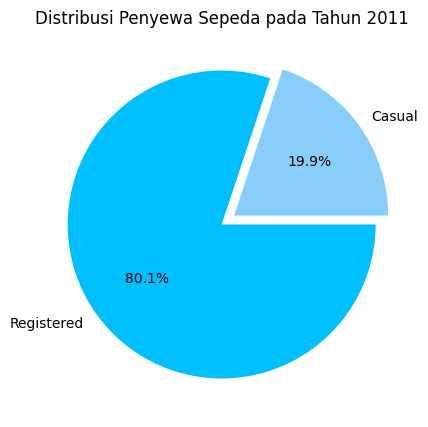

In [19]:
users_2011 = [total_casual_2011, total_registered_2011]
labels = ['Casual', 'Registered']
colors = ['#87CEFA', '#00BFFF']
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(
  x=[total_casual_2011, total_registered_2011],
  labels=labels,
  autopct='%1.1f%%',
  colors=colors,
  explode=explode
)
plt.title('Distribusi Penyewa Sepeda pada Tahun 2011', loc='center')
plt.show()

Berdasarkan Pie Chart di atas dapat diketahui bahwa pada tahun 2011 jumlah penyewa sepeda terbagi menjadi 80.1% penyewa terdaftar (registered) dan 19.9% penyewa casual.

Selanjutnya adalah kode untuk mengetahui jumlah distribusi penyewa sepeda terdaftar (registered) dan penyewa casual, serta jumlah total penyewa sepeda pada tahun 2012.

In [20]:
total_casual_2012 = day_df[(day_df['yr'] == 2012)]['casual'].sum()
total_registered_2012 = day_df[(day_df['yr'] == 2012)]['registered'].sum()
total_users_2012 = total_casual_2012 + total_registered_2012

print("casual:", "{:,}".format(total_casual_2012))
print("registered:", "{:,}".format(total_registered_2012))
print("total:", "{:,}".format(total_users_2012))

casual: 372,765
registered: 1,676,811
total: 2,049,576


Dari kode tersebut dapat diketahui bahwa total penyewa sepeda pada tahun 2012 adalah sebanyak 2,049,576. Pada tahun 2012, penyewa sepeda terbagi menjadi 372,765 penyewa casual dan 1,676,811 penyewa terdaftar (registered).

Berikut adalah Pie Chart untuk memudahkan visualisasi distribusi penyewa sepeda pada tahun 2012.

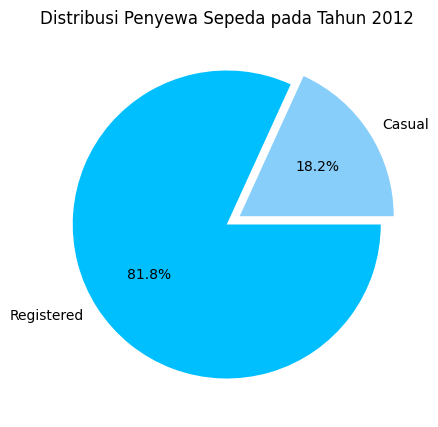

In [21]:
users_2012 = [total_casual_2012, total_registered_2012]
labels = ['Casual', 'Registered']
colors = ['#87CEFA', '#00BFFF']
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(
  x=[total_casual_2012, total_registered_2012],
  labels=labels,
  autopct='%1.1f%%',
  colors=colors,
  explode=explode
)
plt.title('Distribusi Penyewa Sepeda pada Tahun 2012', loc='center')
plt.show()

Berdasarkan Pie Chart di atas dapat diketahui bahwa pada tahun 2012 jumlah penyewa sepeda terbagi menjadi 81.8% penyewa terdaftar (registered) dan 18.2% penyewa casual.

In [22]:
day_df.to_csv("main_data.csv", index=False)

Kode di atas adalah kode untuk menyimpan data yang telah dibersihkan ke `main_data.csv `untuk selanjutnya digunakan pada tahap pembuatan Dashboard.

## Conclusion

- Conclusion pertanyaan 1: Bagaimana hubungan antara jumlah penyewa sepeda dengan suatu musim pada tahun 2011 dan 2012?


1.   Pada tahun 2011, musim dengan jumlah penyewa sepeda terbanyak adalah musim gugur (fall) dengan 419,650 penyewa. Musim dengan penyewa sepeda terbanyak kedua adalah musim panas (summer) dengan 347,316 penyewa. Musim dengan penyewa sepeda terbanyak ketiga adalah musim dingin (winter) dengan 326,137 penyewa. Musim dengan penyewa sepeda tersedikit pada tahun 2011 adalah musim semi (spring) dengan 150,000 penyewa.
2.   Pada tahun 2012, musim dengan jumlah penyewa sepeda terbanyak adalah musim gugur (fall) dengan 641,479 penyewa. Musim dengan penyewa sepeda terbanyak kedua adalah musim panas (summer) dengan 571,273 penyewa. Musim dengan penyewa sepeda terbanyak ketiga adalah musim dingin (winter) dengan 515,476 penyewa. Musim dengan penyewa sepeda tersedikit pada tahun 2012 adalah musim semi (spring) dengan 321,348 penyewa.


> Dapat disimpulkan bahwa baik di tahun 2011 maupun di tahun 2012, musim dengan penyewa sepeda terbanyak adalah musim gugur (fall) dan musim dengan penyewa sepeda tersedikit adalah musim semi (spring). Pada tahun 2012 terjadi peningkatan jumlah penyewa sepeda di tiap musimnya dibandingkan dengan tahun 2011.

- Conclusion pertanyaan 2: Bagaimana distribusi antara penyewa sepeda terdaftar (registered) dan penyewa casual dalam penyewaan sepeda pada tahun 2011 dan 2012?

1.   Pada tahun 2011, diketahui terdapat sebanyak 995,851 penyewa sepeda terdaftar (registered) atau 80.1% dari total penyewa sepeda. Di sisi lain, terdapat 247,252 penyewa sepeda casual atau 19.9% dari total penyewa sepeda.
2.   Pada tahun 2012, diketahui terdapat sebanyak 1,676,811 penyewa sepeda terdaftar (registered) atau 81,8% dari total penyewa sepeda. Di sisi lain, terdapat 372,765 penyewa sepeda casual atau 18.2% dari total penyewa sepeda.


> Dapat disimpulkan bahwa baik di tahun 2011 maupun di tahun 2012, penyewa sepeda didominasi oleh penyewa sepeda terdaftar (registered) yang mencapai 80% dari total seluruh penyewa sepeda dalam satu tahun.



